# Prepare datasets
In this notebook we will prepare cubes of the different datasets used in the project.

In [1]:
import iris.plot as iplt
from attribution.config import init_config
from attribution.preprocessing import (
    prepare_cordex_cube,
    prepare_eobs_cube,
    prepare_era5_cube,
    prepare_gridclim_cube,
    prepare_slens_cube,
)
from cartopy import crs as ccrs
from dask.distributed import Client
import proplot as pplt

/home/sm_erhol/dev/attribution/attribution/bootstrap.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [11]:
client = Client()

Each attribution project should have a `config.yml` in its root directory.
We can load in the the configuration using `init_config`

In [12]:
CFG = init_config()

This contains the paths where to find input data, and later store results.
Most functions will read from this automatically, but  it is also possible to pass custom arguments, overriding the configuration.

In [13]:
CFG

{'paths': {'project_folder': '/nobackup/rossby27/users/sm_erhol/station_attribution_article/summer2018',
  'data': {'gridclim': '/nobackup/smhid17/proj/sik/SMHIGridClim_NORDIC-11/v0.9/netcdf/day/',
   'eobs': '/home/rossby/imports/obs/EOBS/EOBS24-0e/EUR-10/remap/EUR-11/day/',
   'era5': '/home/rossby/imports/obs/ECMWF/ERA5/remap/EUR-11/day/',
   'cordex': '/nobackup/rossby21/sm_renwi/DATA/MidasOut/',
   's-lens': '/nobackup/rossby22/rossby/joint_exp/large_ensemble/cmorized/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/'},
  'shapefile': '/home/sm_erhol/data/ne_10_admin_0_countries/ne_10m_admin_0_countries.shp'},
 'project_name': 'summer2018',
 'filenames': {'gridclim': 'SMHIGridClim_day',
  'eobs': 'EOBS_day',
  'era5': 'era5_day',
  'cordex': 'CORDEX-ENS_rcp85_day',
  's-lens': 's-lens_day'},
 'epsg': 3006,
 'variable': ['tasmax', 'tasmin'],
 'index_name': ['txge25', 'ctxge25'],
 'partial_dates': {'low': {'year': 1989},
  'high': {'year': 2018, 'month': 12, 'day': 31}},
 'season

The variable that will be loaded is also defined in the configuration.
Depending on the project this can be one or more variables.
In the case the project is configured with more than one variable, one has to be selected and subsequently passed to the difference `prepare_*` functions.

In [14]:
# Here we have two variables.
CFG["variable"]

['tasmax', 'tasmin']

In [15]:
# Select the first one.
variable = CFG["variable"][0]
print(variable)

tasmax


<div class="alert alert-info"><b>To prepare all datasets, this entire notebook should be run once for each variable in CFG.</b></div>

## Prepare GridClim
We start by preparing the GridClim dataset.
If the paths in `config.yml` are defined correctly this is as simple as calling `prepare_gridclim_cube`.
This will prepare an `iris.Cube` of the entire dataset, and mask the data with a combination of an outline of Sweden and a region of interest.
This functionality is the same for all `prepare_*_cube` functions.

In [16]:
# We chose to return a cube to make sure that it worked.
cube = prepare_gridclim_cube(variable=variable, return_cube=True)

Loading GridClim
Realising cube, see progression in dask UI
Saving cube
Finished


We can inspect the cube

and plot it to make sure that we actually selected the region we are interested in

/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


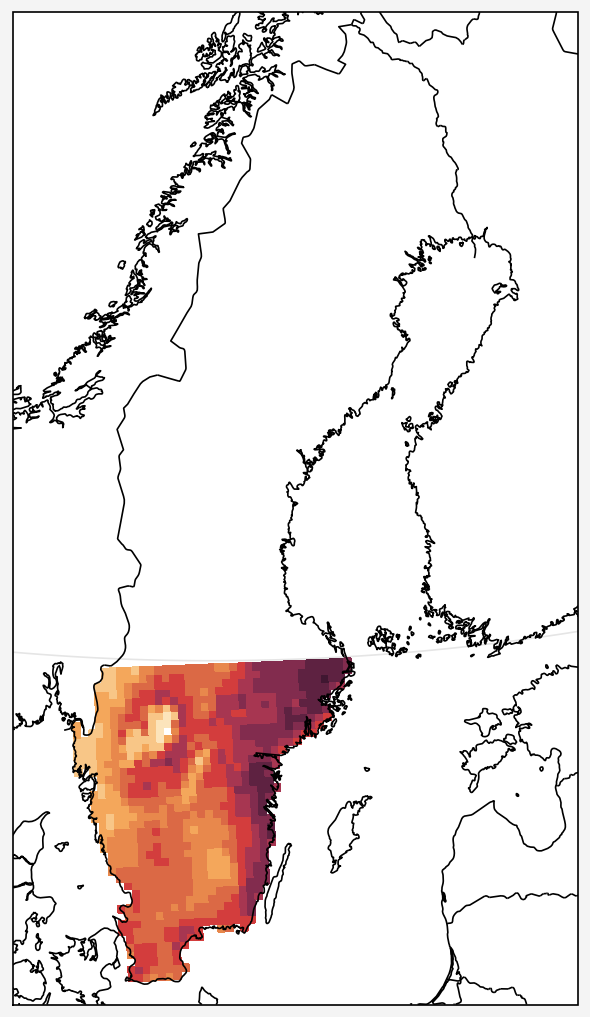

In [9]:
fig, ax = pplt.subplots(
    figwidth="7.5cm", projection=ccrs.epsg(3006)
)
# Just a random day in the dataset.
iplt.pcolormesh(cube[900, :, :], axes=ax[0])
ax.format(
    coast=True,
    borders=True,
    reso="hi",
)

## Prepare EOBS
We do the same thing for the EOBS dataset.

In [19]:
cube = prepare_eobs_cube(variable=variable, return_cube=True)

Loading GridClim
Loading EOBS
Extracting domain
Extracting timespan
Realising cube, see progression in dask UI
Saving cube
Finished


/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/iris/coords.py:2047: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


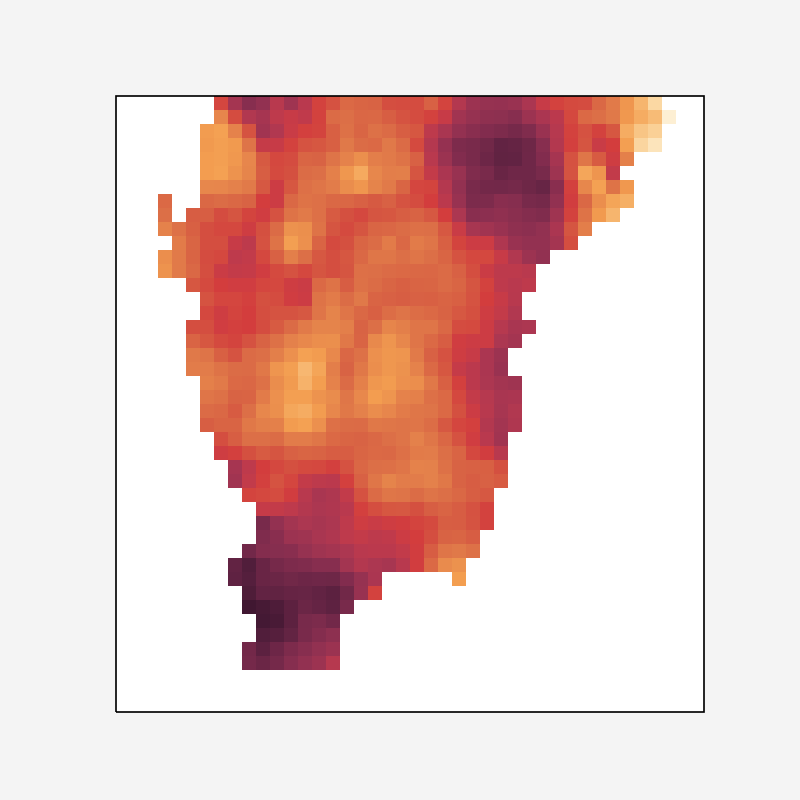

In [20]:
# Again, we make sure that it selected the region we want.
iplt.pcolormesh(cube[500, :, :]);

## Prepare ERA5
Same thing for the ERA5 dataset.

In [21]:
era_cube = prepare_era5_cube(variable=variable, return_cube=True)

Loading GridClim
Loading ERA5
Extracting domain
Extracting timespan
Realising cube, see progression in dask UI
Saving cube
Finished


## Prepare CORDEX
Prepare the CORDEX dataset.

<div class="alert alert-warning"><b>In the case of memory issues processing the following dataset, try restarting the dask client.</b></div>

In [ ]:
cube = prepare_cordex_cube(variable=variable, return_cube=True)

Loading GridClim
Loading the CORDEX ensemble
Extracting timespan
Converting coordinates.
Converting calendar.
Converting calendar.
Converting calendar.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting calendar.
Converting calendar.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting coordinates.
Converting calendar.
Converting calendar.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting calendar.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting calendar.
Converting coordinates.
Converting coordinates.
Co

/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/iris/_lazy_data.py:303: PerformanceWarning: Increasing number of chunks by factor of 13
  result = da.stack(list(stack))


Realising cube, see progression in dask UI


## Prepare S-Lens

<div class="alert alert-warning"><b>In the case of memory issues processing the following dataset, try restarting the dask client.</b></div>

In [29]:
cube = prepare_slens_cube(variable=variable, return_cube=True)

Loading S-Lens ensemble members


Ens. chunk:   0%|          | 0/5 [00:00<?, ?it/s]

Chunk member:   0%|          | 0/10 [00:00<?, ?it/s]

Chunk member:   0%|          | 0/10 [00:00<?, ?it/s]

Chunk member:   0%|          | 0/10 [00:00<?, ?it/s]

Chunk member:   0%|          | 0/10 [00:00<?, ?it/s]

Chunk member:   0%|          | 0/10 [00:00<?, ?it/s]

Concatenating chunks
Realising cube, see progression in dask UI


/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/distributed/client.py:3095: UserWarning: Sending large graph of size 2.01 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2023-04-19 09:42:56,464 - distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/distributed/protocol/core.py", line 158, in loads
    return msgpack.loads(
  File "msgpack/_unpacker.pyx", line 194, in msgpack._cmsgpack.unpackb
ValueError: 2157187929 exceeds max_bin_len(2147483647)
2023-04-19 09:42:56,489 - distributed.core - ERROR - Exception while handling op register-client
Traceback (most recent call last):
  File "/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/distributed/core.py", line 831, in _handle_comm
    result = await result
  File "/home/sm_erhol/.conda/envs/erhol/lib/python3.10/site-packages/distributed/sc

CancelledError: ('concatenate-8dd44cf8fb1d94f0c1c3a2af85a11f42', 6, 13, 0, 0)

In [8]:
client.shutdown()

## Next steps
[Validation](./3_validation.ipynb)

[Attribution](./4_attribution.ipynb)